# Interpret the results on mouse brain data

In [1]:
import os
import sys
sys.path.append("../")
device = "cuda"
import importlib


In [2]:
import scanpy as sc
import squidpy as sq
import pandas as pd
from tqdm.notebook import tqdm
import scipy as sp
import numpy as np
import multiprocessing
import pickle as pkl
import torch
import gc
import sklearn.metrics

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'arial'

pltkw = dict(bbox_inches='tight', transparent=True)

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [3]:
import steamboat as sf
import steamboat.tools
# importlib.reload(spaceformer.benchmarks)

## Read all slides

In [4]:
adata = sc.read_h5ad("E:/allen-brain-cell-atlas/abc_atlas_data/temp/Zhuang-ABCA-1-labeled.h5ad")
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [5]:
model = sf.Steamboat(adata.var_names.tolist(), n_heads=50, n_scales=3)
model = model.to(device)
model.load_state_dict(torch.load('saved_models/mmbrain.pth', weights_only=True), strict=False)

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


_IncompatibleKeys(missing_keys=[], unexpected_keys=['spatial_gather.w_local._scale', 'spatial_gather.w_global._scale'])

In [6]:
gene_df = sf.tools.calc_var(model)

In [7]:
adatas = []
for i in adata.obs['brain_section_label'].unique():
    adatas.append(adata[adata.obs['brain_section_label'] == i])
    adatas[-1].obs['global'] = 0

adatas = sf.prep_adatas(adatas, norm=False, log1p=False, scale=False)
dataset = sf.make_dataset(adatas, sparse_graph=True, regional_obs=['global'])

C:\Users\lshh\AppData\Local\Temp\ipykernel_28692\1309524124.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
C:\Users\lshh\AppData\Local\Temp\ipykernel_28692\1309524124.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
C:\Users\lshh\AppData\Local\Temp\ipykernel_28692\1309524124.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
C:\Users\lshh\AppData\Local\Temp\ipykernel_28692\1309524124.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
C:\Users\lshh\AppData\Local\Temp\ipykernel_28692\1309524124.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
C:\Users\l

  0%|          | 0/129 [00:00<?, ?it/s]

Using ['global'] as regional annotations.


  0%|          | 0/129 [00:00<?, ?it/s]

In [8]:
sf.tools.calc_obs(adatas, dataset, model, get_recon=False)
sf.tools.gather_obs(adata, adatas)

  0%|          | 0/129 [00:00<?, ?it/s]

AnnData object with n_obs × n_vars = 2616328 × 1122
    obs: 'brain_section_label', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z', 'subclass_confidence_score', 'cluster_confidence_score', 'high_quality_transfer', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'x_ccf', 'y_ccf', 'z_ccf', 'parcellation_index', 'parcellation_organ', 'parcellation_category', 'parcellation_division', 'parcellation_structure', 'parcellation_substructure', 'parcellation_organ_color', 'parcellation_category_color', 'parcellation_division_color', 'parcellation_structure_color', 'parcellation_substructure_color'
    var: 'gene_symbol'
    uns: 'log1p'
    obsm: 'spatial', 'q', 'local_k', 'ego_attn', 'local_attn', 'global_attn', 'attn', 'global_k_0'

In [9]:
gene_df['gene_symbol'] = adata.var['gene_symbol']
gene_df.to_csv("../experiments/steamboat_mouse_brain_metagenes.csv")

In [10]:
print(*gene_df.columns)

q_0 q_1 q_2 q_3 q_4 q_5 q_6 q_7 q_8 q_9 q_10 q_11 q_12 q_13 q_14 q_15 q_16 q_17 q_18 q_19 q_20 q_21 q_22 q_23 q_24 q_25 q_26 q_27 q_28 q_29 q_30 q_31 q_32 q_33 q_34 q_35 q_36 q_37 q_38 q_39 q_40 q_41 q_42 q_43 q_44 q_45 q_46 q_47 q_48 q_49 k_local_0 k_local_1 k_local_2 k_local_3 k_local_4 k_local_5 k_local_6 k_local_7 k_local_8 k_local_9 k_local_10 k_local_11 k_local_12 k_local_13 k_local_14 k_local_15 k_local_16 k_local_17 k_local_18 k_local_19 k_local_20 k_local_21 k_local_22 k_local_23 k_local_24 k_local_25 k_local_26 k_local_27 k_local_28 k_local_29 k_local_30 k_local_31 k_local_32 k_local_33 k_local_34 k_local_35 k_local_36 k_local_37 k_local_38 k_local_39 k_local_40 k_local_41 k_local_42 k_local_43 k_local_44 k_local_45 k_local_46 k_local_47 k_local_48 k_local_49 k_global_0 k_global_1 k_global_2 k_global_3 k_global_4 k_global_5 k_global_6 k_global_7 k_global_8 k_global_9 k_global_10 k_global_11 k_global_12 k_global_13 k_global_14 k_global_15 k_global_16 k_global_17 k_global_18 k_

In [11]:
adata

AnnData object with n_obs × n_vars = 2616328 × 1122
    obs: 'brain_section_label', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z', 'subclass_confidence_score', 'cluster_confidence_score', 'high_quality_transfer', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'x_ccf', 'y_ccf', 'z_ccf', 'parcellation_index', 'parcellation_organ', 'parcellation_category', 'parcellation_division', 'parcellation_structure', 'parcellation_substructure', 'parcellation_organ_color', 'parcellation_category_color', 'parcellation_division_color', 'parcellation_structure_color', 'parcellation_substructure_color'
    var: 'gene_symbol'
    uns: 'log1p'
    obsm: 'spatial', 'q', 'local_k', 'ego_attn', 'local_attn', 'global_attn', 'attn', 'global_k_0'

## Head weights

AxisArrays with keys: spatial, q, local_k, ego_attn, local_attn, global_attn, attn, global_k_0

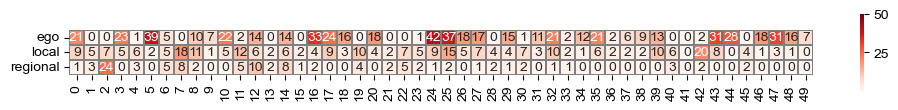

In [13]:
## For simplicity, we only visualize the weights from one slide here, not all of them.
head_weights = sf.tools.calc_head_weights(adatas, model)
sf.tools.plot_head_weights(head_weights, figsize=(12, 1), multiplier=1000, heatmap_kwargs={'vmax': 50})

In [14]:
avg_df = pd.DataFrame(index=adata.obs['class'].unique(), columns=gene_df.columns)

In [15]:
for cell_type in tqdm(adata.obs['class'].unique()):
    for head in gene_df.columns:
        if head == 'gene_symbol' or head[:2] == 'v_':
            continue
        if head[:7] == 'k_local':
            what = 'local_k'
        elif head[:2] == 'q_':
            what = 'q'
        elif head[:8] == 'k_global':
            what = 'global_k_0'
        else:
            print(head)
            assert False
        i = int(head.split('_', -1)[-1])
        avg_df.loc[cell_type, head] = adata.obsm[what][adata.obs['class'] == cell_type, i].mean(axis=0)
        

  0%|          | 0/34 [00:00<?, ?it/s]

In [16]:
avg_df[[i for i in avg_df.columns if '_0' in i]]

,q_0,k_local_0,k_global_0,v_0
06 CTX-CGE GABA,0.031404,0.007611,3.104922,NaN
33 Vascular,0.020046,0.008796,1.651256,NaN
30 Astro-Epen,0.019359,0.011489,2.094772,NaN
34 Immune,0.020306,0.009748,2.724025,NaN
13 CNU-HYa Glut,0.040366,0.020245,4.002817,NaN
01 IT-ET Glut,0.038714,0.009966,1.765149,NaN
31 OPC-Oligo,0.017834,0.007262,1.996547,NaN
02 NP-CT-L6b Glut,0.046328,0.007919,1.81751,NaN
03 OB-CR Glut,0.029018,0.012372,1.667326,NaN
07 CTX-MGE GABA,0.031562,0.012769,3.32925,NaN


In [41]:
cell_scores[[i for i in cell_scores.columns if '_0' in i]].iloc[:10]

,q_0,k_local_0,k_global_0,ego_attn_0,local_attn_0,global_attn_0
cell_label,,,,,,
182941331246012878296807398333956011710,0.020607,0.000002,0.003622,6.333571e-03,1.533138e-03,2.586623e-04
221260934538535633595532020856387724686,0.013862,0.032135,0.010019,2.446443e-03,8.879477e-07,1.485284e-04
22228792606814781533240955623030943708,0.000005,0.000006,0.003584,3.039526e-10,2.197404e-07,5.488887e-08
272043042552227961220474294517855477150,0.003612,0.000008,0.008678,1.184084e-04,1.104359e-04,2.758618e-05
110116287883089187971185374239350249328,0.014264,0.000008,0.008099,2.205989e-03,6.226546e-07,1.301574e-04
133529526547955128870747361202131334625,0.022663,0.000014,0.007578,3.534006e-03,2.833612e-03,1.312377e-04
137910993561966678865331065719080754740,0.004742,0.000003,0.003020,3.540562e-04,3.170661e-07,6.283556e-05
162796414422771027844640234303240756273,0.019536,0.000004,0.007737,4.373488e-03,3.158197e-04,1.884029e-04
245945371086686768587266749390128605629,0.005701,0.000007,0.009634,2.135565e-04,2.859241e-04,3.152761e-05


In [30]:
colnames = sum([[i + f'_{j}' for j in range(50)] for i in ['q', 'k_local', 'k_global', 'ego_attn', 'local_attn', 'global_attn']], [])

In [31]:
cell_scores = pd.DataFrame(data = np.hstack([adata.obsm[i] for i in ['q', 'local_k', 'global_k_0', 'ego_attn', 'local_attn', 'global_attn']]), 
                           index=adata.obs_names, columns=colnames)

In [40]:
np.save("../experiments/steamboat_mouse_brain_cell_scores.hdf",
        np.hstack([adata.obsm[i] for i in ['q', 'local_k', 'global_k_0', 'ego_attn', 'local_attn', 'global_attn']]))

In [17]:
avg_df.to_csv("../experiments/steamboat_mouse_brain_metagene_by_celltypes_corrected.csv")

In [23]:
adata.obs.columns

Index(['brain_section_label', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z',
       'subclass_confidence_score', 'cluster_confidence_score',
       'high_quality_transfer', 'neurotransmitter', 'class', 'subclass',
       'supertype', 'cluster', 'neurotransmitter_color', 'class_color',
       'subclass_color', 'supertype_color', 'cluster_color', 'x_ccf', 'y_ccf',
       'z_ccf', 'parcellation_index', 'parcellation_organ',
       'parcellation_category', 'parcellation_division',
       'parcellation_structure', 'parcellation_substructure',
       'parcellation_organ_color', 'parcellation_category_color',
       'parcellation_division_color', 'parcellation_structure_color',
       'parcellation_substructure_color'],
      dtype='object')

In [25]:
adata.obs[['brain_section_label', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z',
       'neurotransmitter', 'class', 'subclass',
       'supertype', 'cluster', 'parcellation_index', 'parcellation_organ',
       'parcellation_category', 'parcellation_division',
       'parcellation_structure', 'parcellation_substructure']].to_csv("../experiments/steamboat_mouse_brain_cell_metadata.csv.gz", compression='gzip')